In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
image_path = '../output_videos/cropped_image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

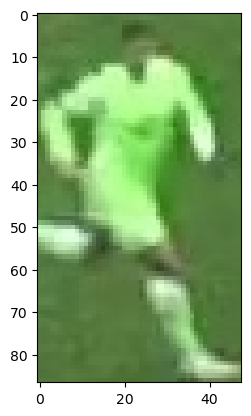

In [3]:
plt.imshow(image)
plt.show()

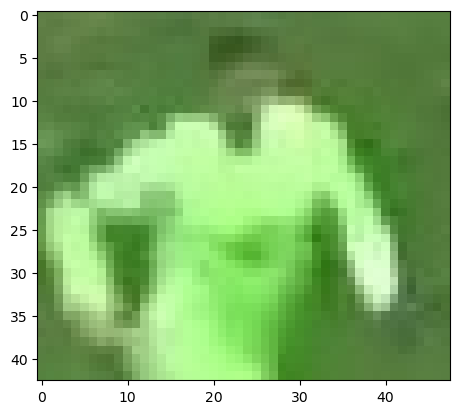

In [4]:
top_half_image = image[:image.shape[0] // 2, :]
plt.imshow(top_half_image)

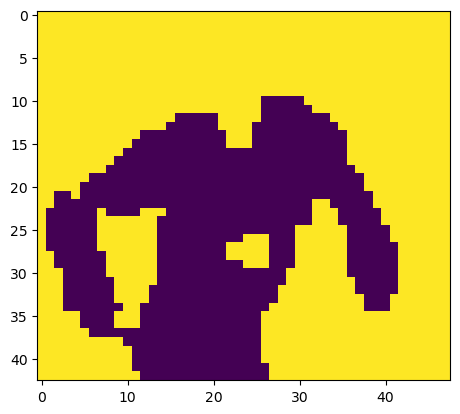

In [8]:
image_2d = top_half_image.reshape(-1, 3)

kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

labels = kmeans.labels_
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

plt.imshow(clustered_image)
plt.show()

In [9]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [11]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


In [12]:
kmeans.cluster_centers_[player_cluster]

array([170.26648721, 235.62449529, 142.0538358 ])

In [ ]:
'''for track_id, player in tracks['players'][0].items():
        bbox = player['bbox']
        frame = video_frames[0]
        
        cropped_image = frame[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
        
        cv2.imwrite(f'output_videos/cropped_image.jpg', cropped_image)
        
        
        
    break''' #import in main.py